classificar em 2 a 8 hz

In [1]:
import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import rfft, irfft, fftfreq
import os
 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

In [2]:
def dadosPK(tipo):
    dir_ct = "/Users/jonat/OneDrive/Documents/Protocolo_PKS/Protocolo_PKS/dados_edf/DB_REPO/edf/"+tipo+"/"
    return os.listdir("/Users/jonat/OneDrive/Documents/Protocolo_PKS/Protocolo_PKS/dados_edf/DB_REPO/edf/"+tipo+"/")

In [3]:
def carregarDataFrame(tipo, caminho):
    caminho = "/Users/jonat/OneDrive/Documents/Protocolo_PKS/Protocolo_PKS/dados_edf/DB_REPO/edf/"+tipo+"/"+caminho
    
    edf = pyedflib.EdfReader(caminho)
    n = edf.signals_in_file
    sigbufs = np.zeros((n, edf.getNSamples()[0]))
    for i in np.arange(n):
         sigbufs[i, :] = edf.readSignal(i)
    edf._close()
    del edf

    return pd.DataFrame(data=sigbufs.T, columns=['ch1', 'ch2', 'ch3', 'ch4'])

In [4]:
def fft(df, canal):
    amostras = int(df[canal][2000:11000].shape[0]*500/2000)
    sinal = np.abs(np.fft.fft(df[canal][2000:11000]))[:amostras]
    freq = np.linspace(0,500,amostras)
    
    return (sinal,freq)

def plotarFFT(a, b, titulo):
    plt.title(titulo)
    plt.plot(b,a)
    plt.xlim([0,500])
    plt.ylim([0,5000])
    plt.show

In [5]:
parkinson = dadosPK('parkinson')
controle = dadosPK('controle')
df_ct = [ carregarDataFrame('controle', nome) for nome in controle]
df_pk = [ carregarDataFrame('parkinson', nome) for nome in parkinson]

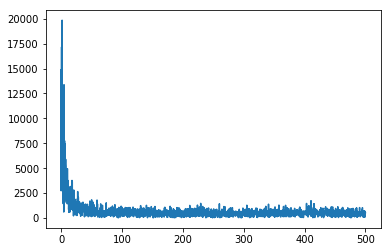

In [6]:
sinalFFT, freq = fft(df_ct[0], 'ch1')
plt.plot( freq, sinalFFT)
plt.show()

# Filtrando os dados

In [7]:
def frequecia(df, canal):
    sinalFFT = [fft(data, canal)[0] for data in df]

    return sinalFFT

In [8]:
sinalCT = frequecia(df_ct, 'ch1')
sinalPK = frequecia(df_pk, 'ch1')

In [9]:
rotulosCT = [0 for _ in sinalCT]
rotulosPK = [1 for _ in sinalPK]

## Separando os dados (Treino, teste e validação)

In [10]:
trainData = sinalCT + sinalPK
rotulos = rotulosCT + rotulosPK

In [11]:
X_train, X_test, y_train, y_teste = train_test_split(trainData, rotulos, test_size=0.3)
X_validate, X_test, y_validade, y_teste = train_test_split(X_test, y_teste, test_size=0.5)

## Selhecionando melhores parametros

param_grid = {'C':[0.0001, 0.001, 0.1, 1], 
              'degree':[3,4], 
              'gamma':[0.1,0.01,0.001,0.0001], 
              'kernel':['poly', 'rbf', 'sigmoid']
             }

In [12]:
param_grid = {'C':[1, 0.1, 0.001, 0.0001], 
              'degree':[3,4], 
              'gamma':[1,0.1,0.01,0.001,0.0001], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [13]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

## Treinando

In [14]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] C=1, degree=3, gamma=1, kernel=linear ...........................
[CV] . C=1, degree=3, gamma=1, kernel=linear, score=0.5, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=linear ...........................
[CV]  C=1, degree=3, gamma=1, kernel=linear, score=0.7894736842105263, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=linear ...........................
[CV]  C=1, degree=3, gamma=1, kernel=linear, score=0.7368421052631579, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................
[CV] .. C=1, degree=3, gamma=1, kernel=poly, score=0.55, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................
[CV]  C=1, degree=3, gamma=1, kernel=poly, score=0.7894736842105263, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=poly .............................
[CV]  C=1, degree=3, gamma=1, kernel=poly, score=0.8947368421052632, total=   0.0s
[CV] C=1, degree=3, gamma=1, kern

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=1, degree=3, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV]  C=1, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV]  C=1, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=3, gamma=1, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=3, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=3, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=linear .........................
[CV]  C=1, degree=3, gamma=0.1, kernel=linear, score=0.5, total=   0.0s
[CV] C=1, degree=3, gamm

[CV] .... C=1, degree=4, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV]  C=1, degree=4, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV]  C=1, degree=4, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=4, gamma=1, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=4, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=sigmoid ..........................
[CV]  C=1, degree=4, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=linear .........................
[CV]  C=1, degree=4, gamma=0.1, kernel=linear, score=0.5, total=   0.0s
[CV] C=1, degree=4, gamm

[CV] .. C=0.1, degree=3, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=linear .......................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.1, 

[CV]  C=0.1, degree=4, gamma=1, kernel=poly, score=0.47368421052631576, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV] .. C=0.1, degree=4, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=4, gamma=1, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=4, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=4, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s


[CV] C=0.001, degree=3, gamma=1, kernel=poly .........................
[CV]  C=0.001, degree=3, gamma=1, kernel=poly, score=0.7894736842105263, total=   0.0s
[CV] C=0.001, degree=3, gamma=1, kernel=poly .........................
[CV]  C=0.001, degree=3, gamma=1, kernel=poly, score=0.8947368421052632, total=   0.0s
[CV] C=0.001, degree=3, gamma=1, kernel=rbf ..........................
[CV]  C=0.001, degree=3, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.001, degree=3, gamma=1, kernel=rbf ..........................
[CV]  C=0.001, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.001, degree=3, gamma=1, kernel=rbf ..........................
[CV]  C=0.001, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.001, degree=3, gamma=1, kernel=sigmoid ......................
[CV]  C=0.001, degree=3, gamma=1, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=0.001, degree=3, gamma=1, kernel=sigmoid ......................
[CV]  C=0.0

[CV]  C=0.001, degree=3, gamma=0.0001, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=0.001, degree=3, gamma=0.0001, kernel=sigmoid .................
[CV]  C=0.001, degree=3, gamma=0.0001, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.001, degree=3, gamma=0.0001, kernel=sigmoid .................
[CV]  C=0.001, degree=3, gamma=0.0001, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.001, degree=4, gamma=1, kernel=linear .......................
[CV]  C=0.001, degree=4, gamma=1, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.001, degree=4, gamma=1, kernel=linear .......................
[CV]  C=0.001, degree=4, gamma=1, kernel=linear, score=0.7894736842105263, total=   0.0s
[CV] C=0.001, degree=4, gamma=1, kernel=linear .......................
[CV]  C=0.001, degree=4, gamma=1, kernel=linear, score=0.7368421052631579, total=   0.0s
[CV] C=0.001, degree=4, gamma=1, kernel=poly .........................
[CV]  C=0.001, degree=4, gamma=1, kernel=poly, score

[CV]  C=0.001, degree=4, gamma=0.0001, kernel=poly, score=0.7894736842105263, total=   0.0s
[CV] C=0.001, degree=4, gamma=0.0001, kernel=poly ....................
[CV]  C=0.001, degree=4, gamma=0.0001, kernel=poly, score=0.8421052631578947, total=   0.0s
[CV] C=0.001, degree=4, gamma=0.0001, kernel=rbf .....................
[CV]  C=0.001, degree=4, gamma=0.0001, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.001, degree=4, gamma=0.0001, kernel=rbf .....................
[CV]  C=0.001, degree=4, gamma=0.0001, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.001, degree=4, gamma=0.0001, kernel=rbf .....................
[CV]  C=0.001, degree=4, gamma=0.0001, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.001, degree=4, gamma=0.0001, kernel=sigmoid .................
[CV]  C=0.001, degree=4, gamma=0.0001, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=0.001, degree=4, gamma=0.0001, kernel=sigmoid .................
[CV]  C=0.001, degree=4, gamma=0.0001, kernel=sigmoi

[CV]  C=0.0001, degree=3, gamma=0.001, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.0001, degree=3, gamma=0.001, kernel=sigmoid .................
[CV]  C=0.0001, degree=3, gamma=0.001, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.0001, degree=3, gamma=0.0001, kernel=linear .................
[CV]  C=0.0001, degree=3, gamma=0.0001, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.0001, degree=3, gamma=0.0001, kernel=linear .................
[CV]  C=0.0001, degree=3, gamma=0.0001, kernel=linear, score=0.7894736842105263, total=   0.0s
[CV] C=0.0001, degree=3, gamma=0.0001, kernel=linear .................
[CV]  C=0.0001, degree=3, gamma=0.0001, kernel=linear, score=0.7368421052631579, total=   0.0s
[CV] C=0.0001, degree=3, gamma=0.0001, kernel=poly ...................
[CV]  C=0.0001, degree=3, gamma=0.0001, kernel=poly, score=0.55, total=   0.0s
[CV] C=0.0001, degree=3, gamma=0.0001, kernel=poly ...................
[CV]  C=0.0001, degree=3, gamma=0.0

[CV]  C=0.0001, degree=4, gamma=0.001, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.0001, degree=4, gamma=0.001, kernel=sigmoid .................
[CV]  C=0.0001, degree=4, gamma=0.001, kernel=sigmoid, score=0.5, total=   0.0s
[CV] C=0.0001, degree=4, gamma=0.001, kernel=sigmoid .................
[CV]  C=0.0001, degree=4, gamma=0.001, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.0001, degree=4, gamma=0.001, kernel=sigmoid .................
[CV]  C=0.0001, degree=4, gamma=0.001, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.0001, degree=4, gamma=0.0001, kernel=linear .................
[CV]  C=0.0001, degree=4, gamma=0.0001, kernel=linear, score=0.5, total=   0.0s
[CV] C=0.0001, degree=4, gamma=0.0001, kernel=linear .................
[CV]  C=0.0001, degree=4, gamma=0.0001, kernel=linear, score=0.7894736842105263, total=   0.0s
[CV] C=0.0001, degree=4, gamma=0.0001, kernel=linear .................
[CV]  C=0.0001, degree=4, gamma=0.0001

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   12.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 0.1, 0.001, 0.0001], 'degree': [3, 4], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [17]:
 C=0.001, degree=3, gamma=1, kernel=poly

{'C': 0.0001, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [19]:
grid.best_params_

{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [21]:
y_pred = grid.predict(X_test)

## Validando

In [24]:
print(classification_report(y_pred, y_teste))

             precision    recall  f1-score   support

          0       0.60      0.43      0.50         7
          1       0.50      0.67      0.57         6

avg / total       0.55      0.54      0.53        13



In [25]:
nomes = ['parkinson', 'controle']
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão sobre diabetes',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Esperado')
    plt.xlabel('Obtido')

<Figure size 432x288 with 0 Axes>

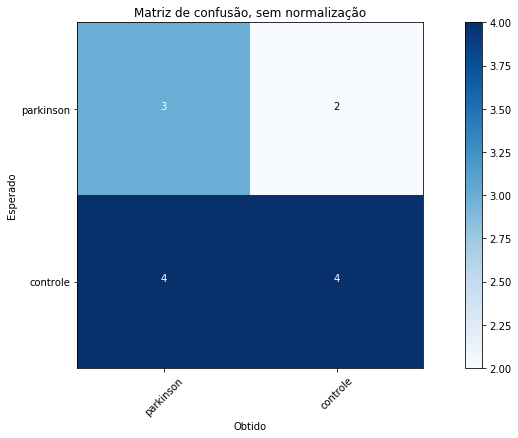

In [26]:
# Matriz de confusão

cnf_matrix = confusion_matrix(y_teste, y_pred )
np.set_printoptions(precision=2)
# Sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Matriz de confusão, sem normalização')